# "EDA was performed by SONU KUMAR"

# Cardio Good Fitness Analysis

**Business Problem** - The market research team at Cardio Good Fitness wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


**About Cardio Good Fitness** - Cardio Good Fitness is a leading brand in the field of fitness equipment. Cardio Good Fitness provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Dataset** - The company collected the data on individuals who purchased a treadmill from the Cardio Good Fitness stores  .The dataset has the following features:

- Product Purchased:	TM195, TM498, or TM798
- Age              :  In years
- Gender           :	Male/Female
- Education        :	In years
- MaritalStatus    :	Single or partnered
- Usage            :	The average number of times the customer plans to use the treadmill each week.
- Income           :	Annual income (in USD)
- Fitness          :	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles            :	The average number of miles the customer expects to walk/run each week

**Product Portfolio** -
- The TM195 is an entry-level treadmill that sells for USD 1,500.
- The TM498 is for mid-level runners that sell for USD 1,750.
- The TM798 treadmill is having advanced features that sell for USD 2,500.

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [2]:
# Creating a deep copy and a shallow copy inorder to work on outliers and other messy data if any.

In [3]:
df = pd.read_csv("CardioGoodFitness.csv")
df_scopy = df.copy(deep=False)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.isnull().sum()/len(df) *100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
characteristics = df.columns.values
for i in characteristics :
    print(i,': ',df[i].unique())
    print()

Product :  ['TM195' 'TM498' 'TM798']

Age :  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Gender :  ['Male' 'Female']

Education :  [14 15 12 13 16 18 20 21]

MaritalStatus :  ['Single' 'Partnered']

Usage :  [3 2 4 5 6 7]

Fitness :  [4 3 2 1 5]

Income :  [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles :  [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]



In [10]:
# Changing datatype of Gender, MaritalStatus and Product from Object to Category.
characteristics_catg = ['Gender', 'MaritalStatus', 'Product']
for i in characteristics_catg:
    df[i] = df[i].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Observations** :
- We can conclude from above that, No null & duplicate value found in features.
- There are 3 different products in this dataset (TM195', 'TM498' ,'TM798').
- Age of customers range from 18 to 50.
- Education ranges from 12 to 21 (years).
- There are both Singles and Partenered as buyer.
- Usage ranges from 2 to 7 (days/week).
- Fitness level of customers ranges from 1-5.
- By changing the dtype from object to category, we are reducing the memory usage.

# **Outliers detection and removal**

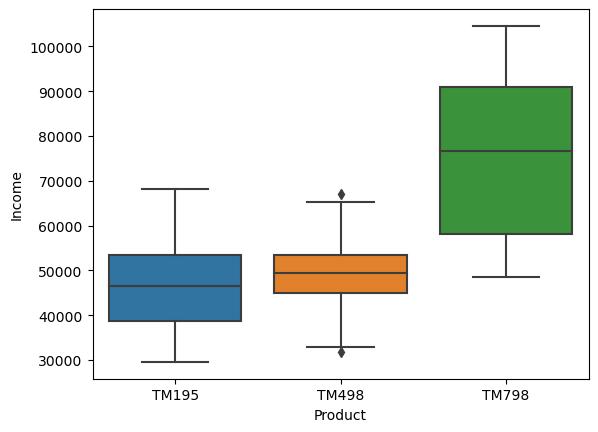

In [11]:
#Boxplot for Products and the Income of customers purchasing those products
sns.boxplot(data=df, x = 'Product', y = 'Income')
plt.show()

**Observations** : 
- TM798 Treadmill with advanced features is preffered by the customers with higher income.
- TM195 Treadmill with the lowest cost and basic features is preffered by the customers with lower income and the TM498 product with moderate features are liked by the customers with upper bracket of low - moderate income group.

**Inference** : 
- There aren't any significant outliers for Products and the Income of customers purchasing those products. So no need for outlier removal here.
- The target audience for TM798 Treadmill should be the higher income group. So the sales team must focus on this range.

**1.Outlier Handling for Income**:

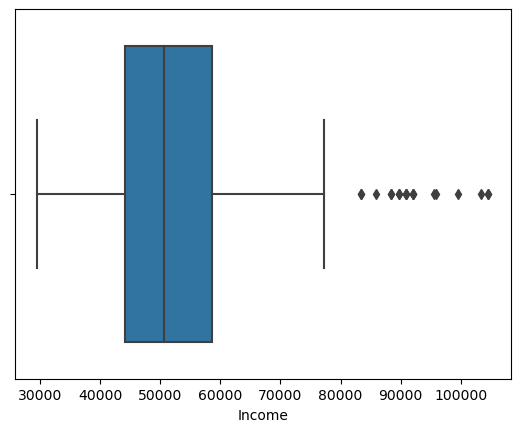

In [12]:
#Boxplot for Income of customers purchasing products before outlier removal
sns.boxplot(data=df, x = 'Income')
plt.show()

In [13]:
df['Income'].mean()

53719.57777777778

In [14]:
#I have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df['Income'].quantile(.25)
q2=df['Income'].median()
q3=df['Income'].quantile(.75)
iqr=q3-q1 
df_scopy=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df_scopy.shape

(161, 9)

In [15]:
df.shape

(180, 9)

In [16]:
df_scopy['Income'].mean()

49119.1801242236

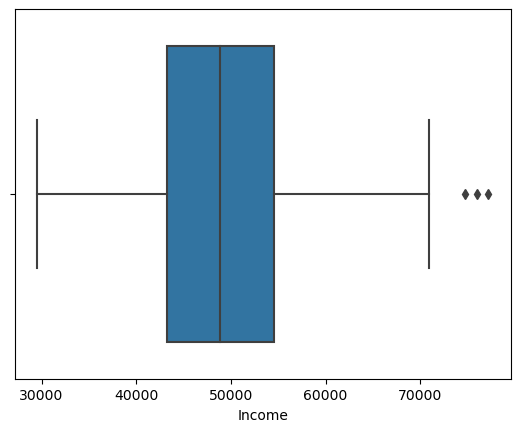

In [17]:
#Boxplot for Income of customers purchasing products after outlier removal
sns.boxplot(data=df_scopy, x = 'Income')
plt.show()

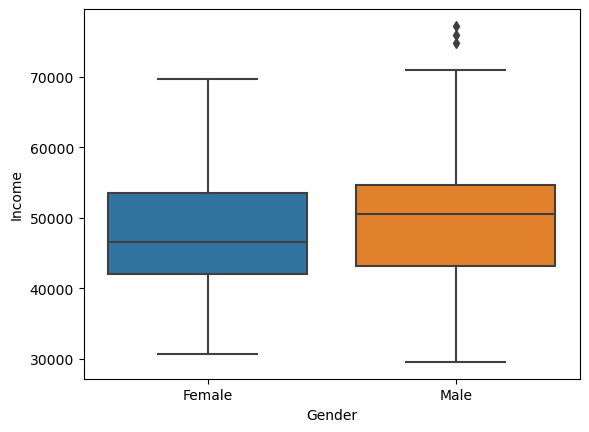

In [18]:
#Boxplot for Gender and the Income of customers purchasing products before outlier removal
sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

In [19]:
df.groupby('Gender')['Income'].mean() # Mean before outlier removal

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

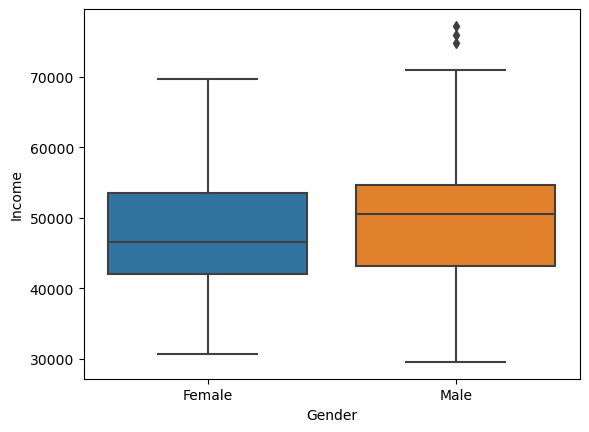

In [20]:
#Boxplot for Gender and the Income of customers purchasing products after outlier removal
sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

In [21]:
df_scopy.groupby('Gender')['Income'].mean() # Mean after outlier removal

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

**Observations**:
- After outlier removal for income, 19 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - **df_scopy**
- In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.


**2.Outlier Handling for Miles:**

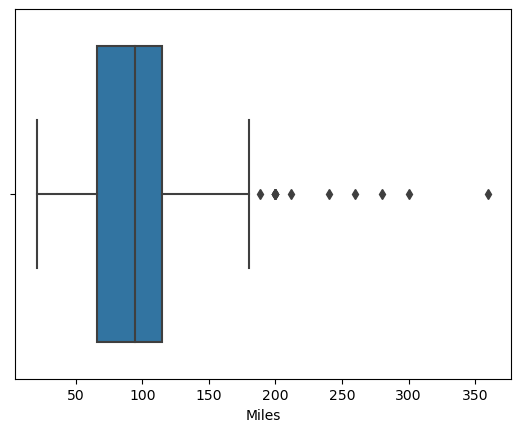

In [22]:
df_scopy1 = df
sns.boxplot(data = df_scopy1, x = 'Miles')
plt.show()

In [23]:
#I have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df_scopy1['Miles'].quantile(.25)
q2=df_scopy1['Miles'].median()
q3=df_scopy1['Miles'].quantile(.75)
iqr=q3-q1 
df_scopy1=df_scopy1[(df_scopy1['Miles']>q1-1.5*iqr)&(df_scopy1['Miles']<q3+1.5*iqr)]
df_scopy1.shape

(167, 9)

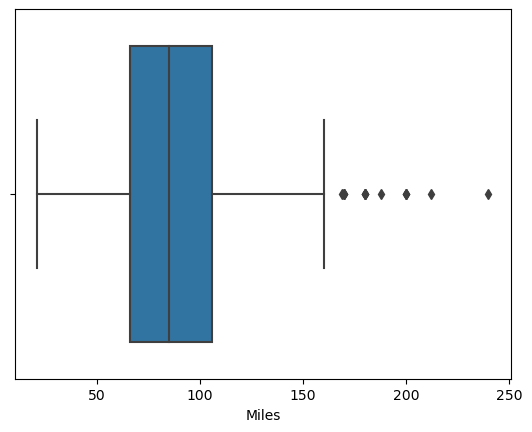

In [24]:
sns.boxplot(data = df_scopy, x = 'Miles')
plt.show()

**Observations**:
- After outlier removal for **Miles**, 13 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - **df_scopy1**
- In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.
- As of now we will be restricting drawing any insights from df_scopy1 and will be foxusing on df_scopy i.e DF obtained after handing outliers on Income column

# EDA - Univariate Analysis

**1.Numerical features**

In [25]:
df_scopy.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [26]:
df = pd.DataFrame(df_scopy)
df_numeric = df.select_dtypes(include=['number'])
new_mean= round(df_numeric.mean(),2)
new_mean

Age             28.16
Education       15.35
Usage            3.27
Fitness          3.14
Income       49119.18
Miles           93.26
dtype: float64

In [27]:
df = pd.DataFrame(df_scopy)
df_numeric = df.select_dtypes(include=['number'])
new_median= round(df_numeric.median(),2)
new_median

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       48891.0
Miles           85.0
dtype: float64

In [28]:
# Difference in the mean and median of Income before removing outliers
diff_org = round(df['Income'].mean()-df['Income'].median(),2)
diff_org

228.18

In [29]:
# Difference in the mean and median of Income after removing outliers
diff_new = round(df_scopy['Income'].mean()-df_scopy['Income'].median(),2)
diff_new

228.18

In [30]:
diff_in_income = round((diff_new/diff_org) *100,2)
diff_in_income

100.0

**Inference** : From above, we can infer that, there's a 7.31% correction in the Income data after removing outliers as we can see that the difference in the mean and median has decreased from 3123 to 228. Hence the new dataframe i.e **df_scopy**is more suitable for carrying further analysis w.r.t income and gender related cases.

In [31]:
#EDA on Univariate Numerical variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0])
    ax[0].axvline(col_data.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
    
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [32]:
num_cols = df.select_dtypes('int64').columns.values
num_cols

array(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'],
      dtype=object)

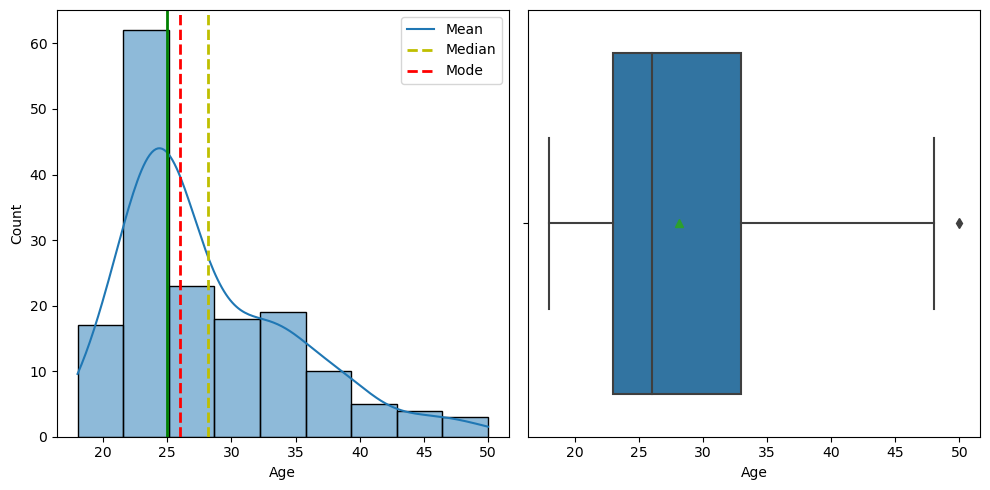

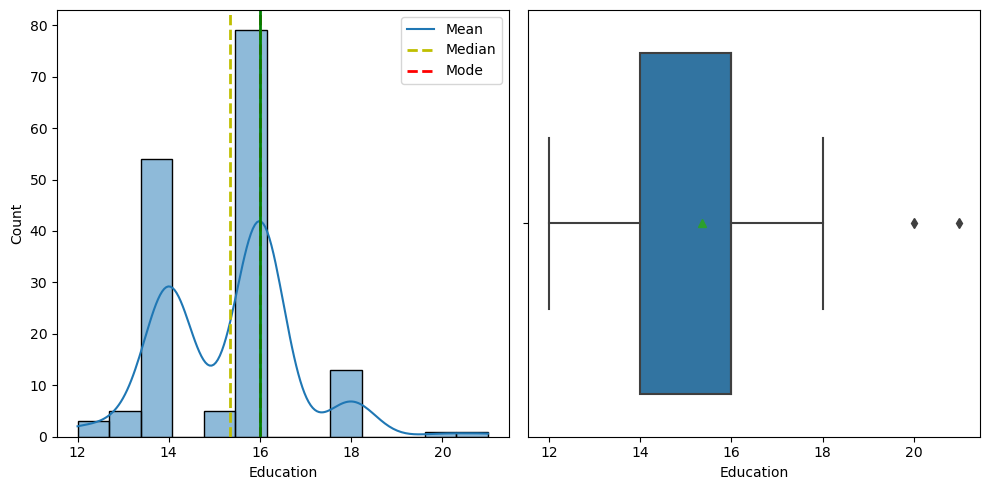

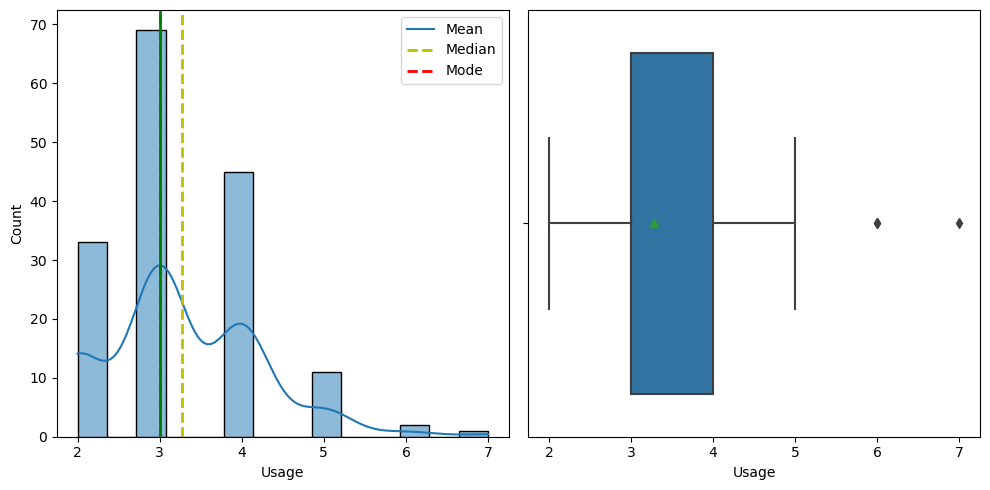

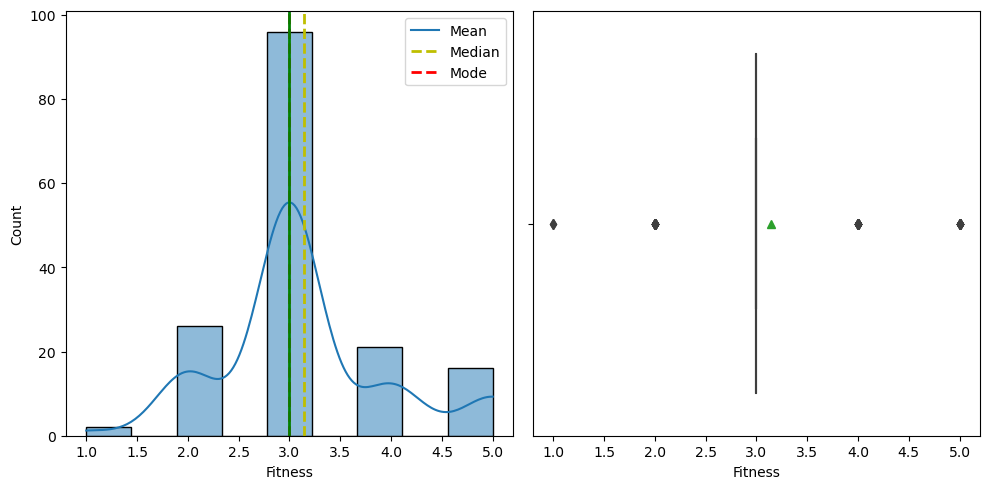

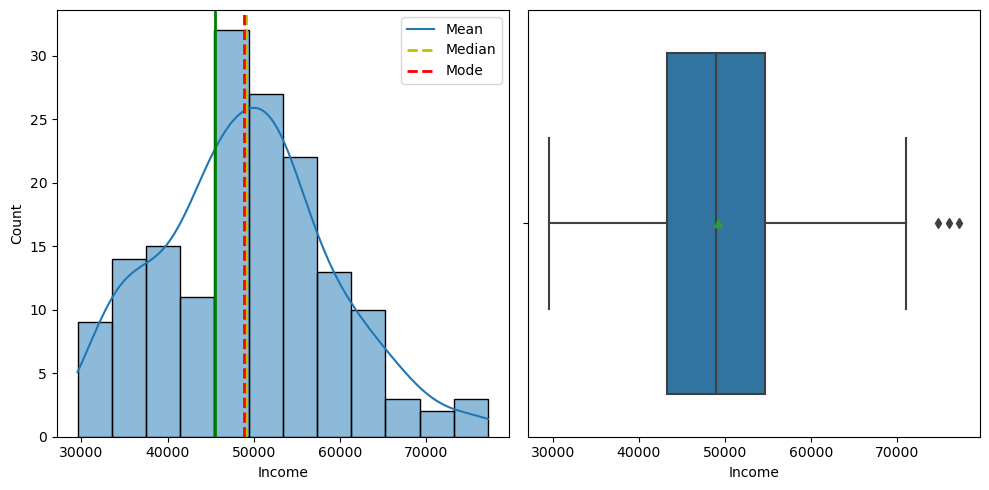

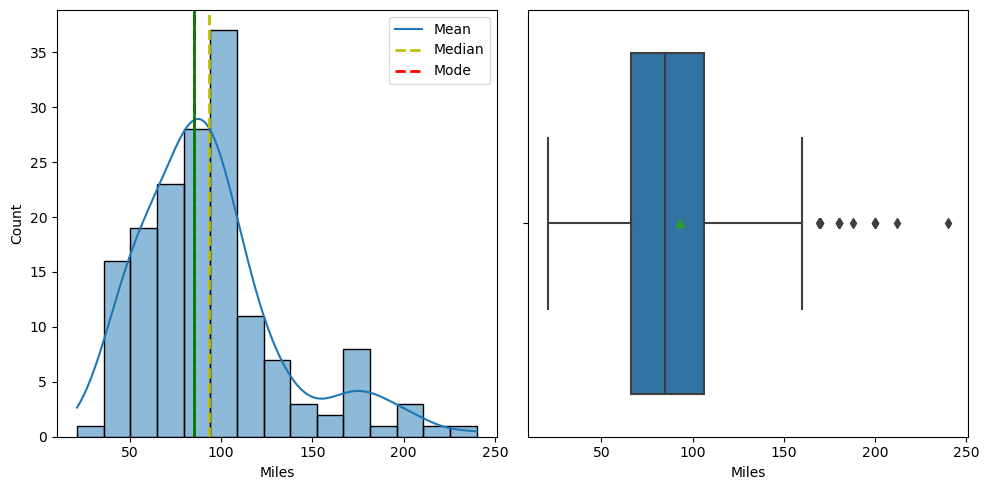

In [33]:
for i in num_cols:
    num_feat(df[i])

**Observations**:

**1.Age**
- Age is skewed towards right.
- Customers buying treadmill after age of 40 and before 20 are very less.
- There are few outliers (higher end).

**2.Education**
- Most customers have 16 years of Education.
- There are few outliers (higher end).

**3.Usage**
- Majority of users prefers to use Treadmills 3-4 times/week.
- There are few outliers (higher end).

**4.Fitness**
- Most customers have 3-3.5 fitness rating (moderate fit).
- Very few customers that uses treadmill have low score i.e 1.

**5.Income**
- Income is skewed toward right.
- Most customers have income less than 70k.
- **Significant no. of Outliers (higher end) are present** as there are very few persons who earn >80k. This makes us mandatory to handle outliers which has been taken care in the first case. Shallow copy of our dataframe(**df_scopy**) consists of modified data after dealing with ouliers.

**6.Miles**
- Miles is skewed towards right.
- Customers run on an average 80 miles per week.
- **Significant no. of Outliers (higher end) are present**, where customers are expecting to run more than 200 miles per week.This makes us mandatory to handle outliers which has been taken care in the first case. Shallow copy of our dataframe(**df_scopy1**) consists of modified data after dealing with ouliers.

**2.Catagorical features:**

In [34]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [35]:
Product_Price = {'TM195' : '1500',
                'TM498' : '1750',
                'TM798' : '2500'}

In [36]:
df['Unit Product Price'] = df['Product'].replace(to_replace = Product_Price )
df['Unit Product Price'].value_counts()

Unit Product Price
1500    80
1750    60
2500    21
Name: count, dtype: int64

In [37]:
price = df['Unit Product Price'].unique()
price

['1500', '1750', '2500']
Categories (3, object): ['1500', '1750', '2500']

In [38]:
quantity = df['Unit Product Price'].value_counts()
quantity

Unit Product Price
1500    80
1750    60
2500    21
Name: count, dtype: int64

In [39]:
for i in range(len(price)):
    tot_sale_USD = quantity[i] * int(price[i])
    print("Total sales for Cardio Good Fitness treadmills of unit price ${} is ${}".format(int(price[i]),tot_sale_USD))    

Total sales for Cardio Good Fitness treadmills of unit price $1500 is $120000
Total sales for Cardio Good Fitness treadmills of unit price $1750 is $105000
Total sales for Cardio Good Fitness treadmills of unit price $2500 is $52500


In [40]:
df["Income"].min(),df["Income"].max()

(29562, 77191)

In [41]:
bins=[0,14,24,40,64,100]  
bins_income = [29000, 40000, 60000, 80000,105000]
label1=['0-14','15-24','25-40','41-64','65-100']
label2=['Children',"Youth", "Young Adults","Old Adults","Seniors"]
label3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['Age Groups']=pd.cut(df['Age'],bins,labels = label1)
df['Age Category']=pd.cut(df['Age'],bins,labels = label2)
df['Income Groups'] = pd.cut(df['Income'],bins_income,labels = label3)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Unit Product Price,Age Groups,Age Category,Income Groups
0,TM195,18,Male,14,Single,3,4,29562,112,1500,15-24,Youth,Low Income
1,TM195,19,Male,15,Single,2,3,31836,75,1500,15-24,Youth,Low Income
2,TM195,19,Female,14,Partnered,4,3,30699,66,1500,15-24,Youth,Low Income
3,TM195,19,Male,12,Single,3,3,32973,85,1500,15-24,Youth,Low Income
4,TM195,20,Male,13,Partnered,4,2,35247,47,1500,15-24,Youth,Low Income


In [42]:
df['Age Category'].value_counts()

Age Category
Young Adults    99
Youth           54
Old Adults       8
Children         0
Seniors          0
Name: count, dtype: int64

In [43]:
# Change on shallow copy(df_scopy) as well for future analysis.
df_scopy['Unit Product Price'] = df_scopy['Product'].replace(to_replace = Product_Price )
df_scopy['Unit Product Price'].value_counts()
bins=[14,24,40,64]       
label1=['14-24','25-40','41-64']
label2=["Youth", "Young Adults","Old Adults"]
df_scopy['Age Groups']=pd.cut(df_scopy['Age'],bins,labels = label1)
df_scopy['Age Category']=pd.cut(df_scopy['Age'],bins,labels = label2)
df_scopy.shape

(161, 12)

In [44]:
# Changing datatype of Unit Product Price from Object to int64.
df['Unit Product Price'] = df['Unit Product Price'].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 165
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             161 non-null    category
 1   Age                 161 non-null    int64   
 2   Gender              161 non-null    category
 3   Education           161 non-null    int64   
 4   MaritalStatus       161 non-null    category
 5   Usage               161 non-null    int64   
 6   Fitness             161 non-null    int64   
 7   Income              161 non-null    int64   
 8   Miles               161 non-null    int64   
 9   Unit Product Price  161 non-null    int64   
 10  Age Groups          161 non-null    category
 11  Age Category        161 non-null    category
 12  Income Groups       161 non-null    category
dtypes: category(6), int64(7)
memory usage: 12.0 KB


In [45]:
#EDA on Univariate Categorical variables

**1.Product**

In [46]:
print(df.Product.value_counts())

Product
TM195    80
TM498    60
TM798    21
Name: count, dtype: int64


<Axes: ylabel='count'>

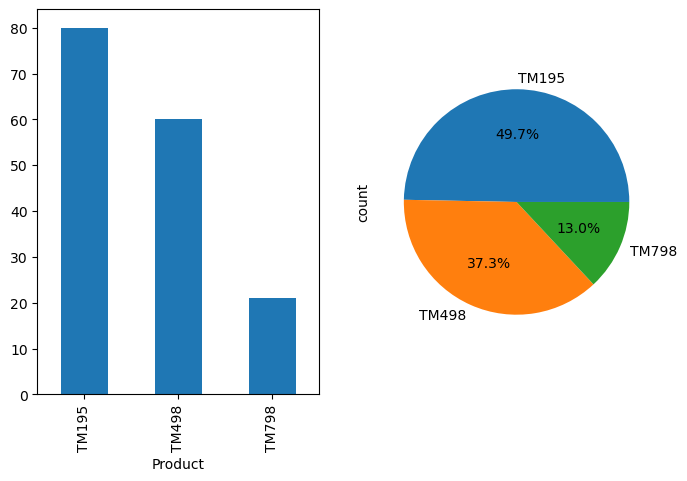

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
df['Product'].value_counts().plot(kind='bar',ax=ax[0])
df['Product'].value_counts().plot(kind='pie',ax=ax[1],autopct='%0.1f%%')

**2.Gender**

In [48]:
print(df.Gender.value_counts())

Gender
Male      88
Female    73
Name: count, dtype: int64


<Axes: ylabel='count'>

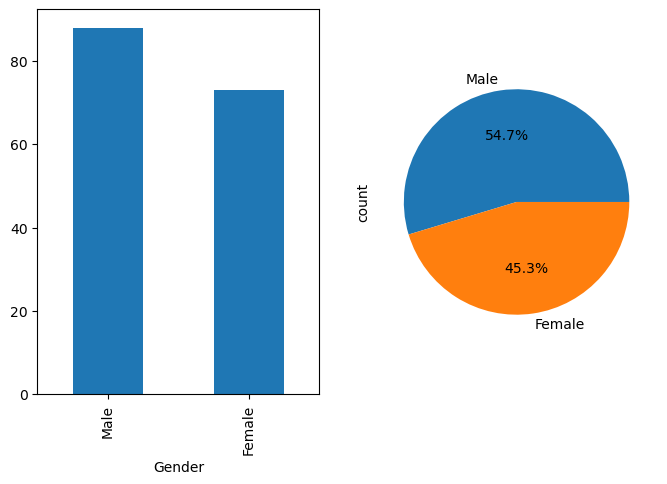

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
df['Gender'].value_counts().plot(kind='bar',ax=ax[0])
df['Gender'].value_counts().plot(kind='pie',ax=ax[1],autopct='%0.1f%%')

**3.MaritalStatus**

In [50]:
print(df.MaritalStatus.value_counts())

MaritalStatus
Partnered    94
Single       67
Name: count, dtype: int64


<Axes: ylabel='count'>

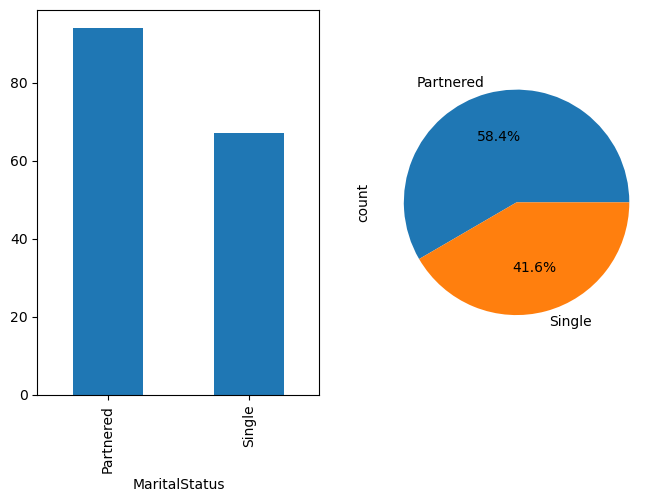

In [51]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
df['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[0])
df['MaritalStatus'].value_counts().plot(kind='pie',ax=ax[1],autopct='%0.1f%%')

**Observations:**
- 1.**Derived Category columns** are Unit Product Price, Age Groups, Age Category
- 2. Product TM195 is the most selling model
- 3. There are more male buyers then female buyers.
- 4. Couples are buying more treadmills then singles.


# EDA - Bivariate Analysis

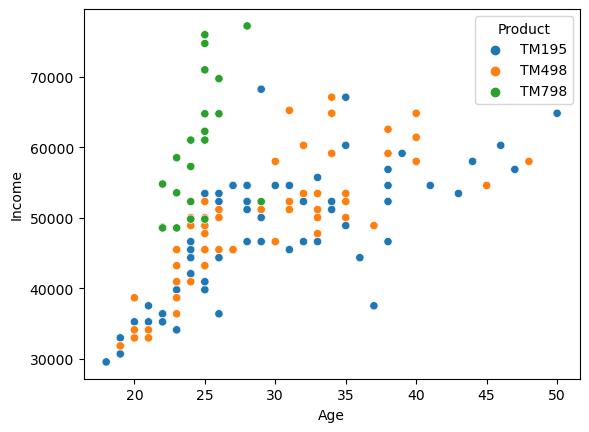

In [52]:
# Original dataframe before outliers removal
sns.scatterplot(x='Age',y='Income',  data=df,  hue='Product')
plt.show()

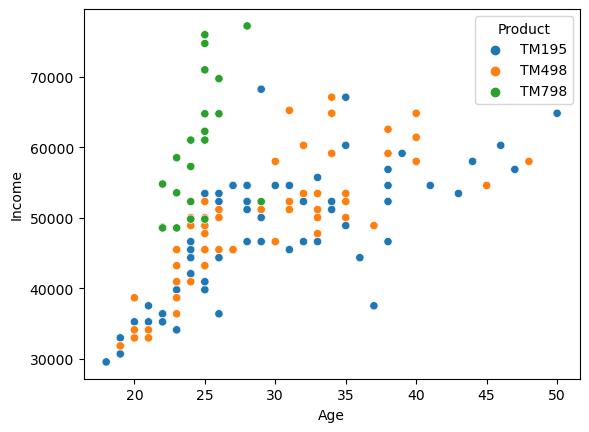

In [53]:
# Modified dataframe after outliers removal
sns.scatterplot(x='Age',y='Income',  data=df_scopy,  hue='Product')
plt.show()

**Observations**:
- Here we can clearly see that, most of the buyers who have income greater than 80K, prefers to buy product TM798 with advanced features. 
- Also, as the second graph without income ouliers, we aren't getting any significant disturbances expect the higher income group, hence it's benefetial to keep outliers i.e first (df) for further inferences.

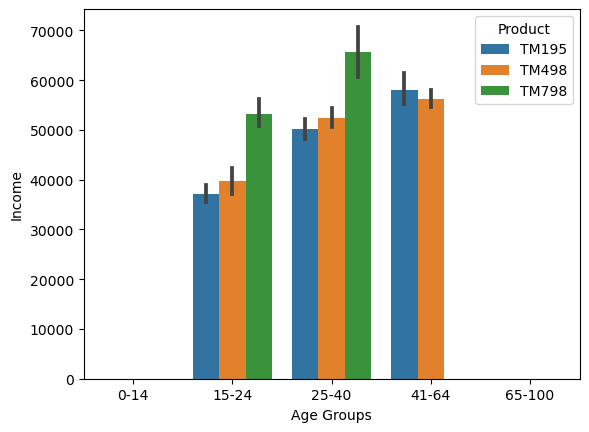

In [54]:
sns.barplot(x='Age Groups',  y='Income',hue='Product',  data=df)
plt.show()

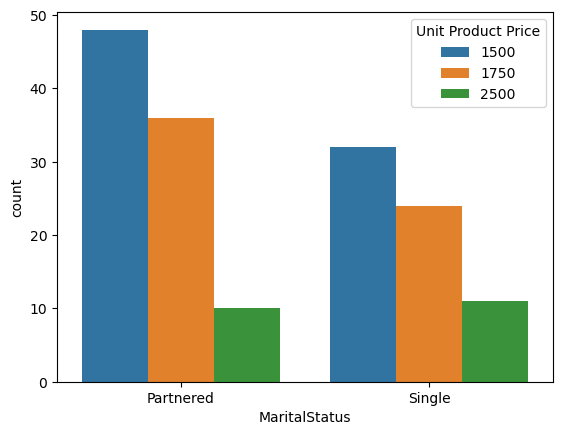

In [55]:
sns.countplot(x='MaritalStatus',
    hue='Unit Product Price',
    data=df)
plt.show()


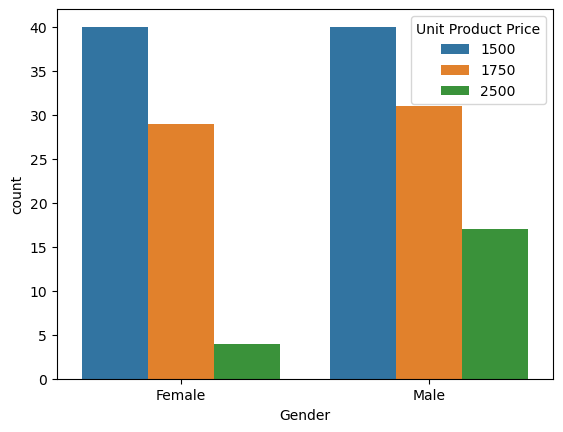

In [56]:
sns.countplot(x='Gender',
    hue='Unit Product Price',
    data=df)
plt.show()


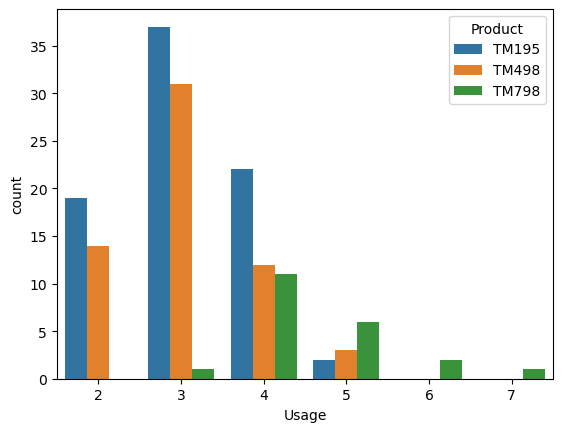

In [57]:
sns.countplot(x='Usage',
    hue='Product',
    data=df)
plt.show()


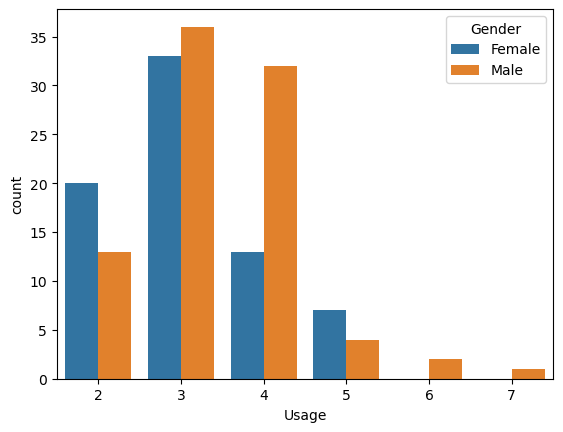

In [58]:
sns.countplot(x='Usage',hue='Gender',data=df)
plt.show()

**Observations and Inferences**:
- From above countplot for Usage , we can clearly see that, as the no. of usage per week of a customer increases (goes beyond 3), then only there's a demand of treadmill with advanced features and highest cost(TM798-> USD 2500) which implies that if a customer is serious and is regular in running, then only he/she prefer purchasing advanced tredmill
- As the seriousness / regularity in terms of usage per week of the customer increases, they prefers treadmill with advanced features rather than low and middle range product. Which implies, Cardio Good Fitness, should focus selling more advance range products to the serious customers i.e target audience should be (gym freaks, health coaches, yoga coaches, fitness enthusiast, etc)

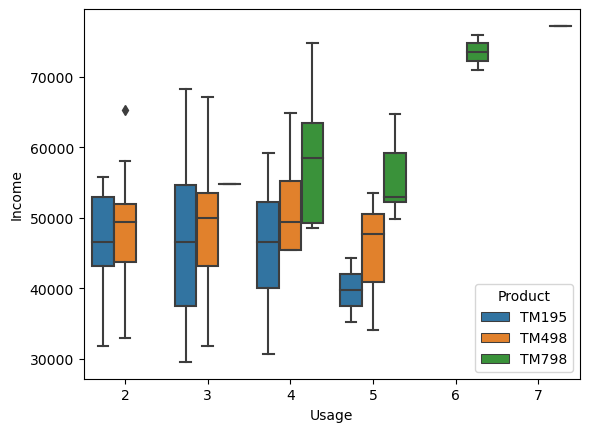

In [59]:
sns.boxplot(x='Usage',
            y = 'Income',
    hue='Product',
    data=df)
plt.show()
#CONC

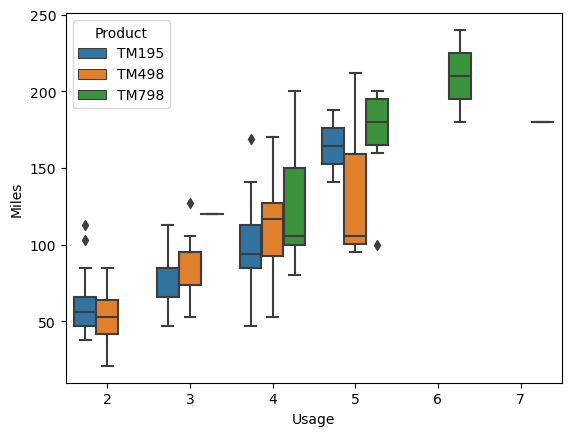

In [60]:
sns.boxplot(x='Usage',
            y = 'Miles',
    hue='Product',
    data=df)
plt.show()
#CONC

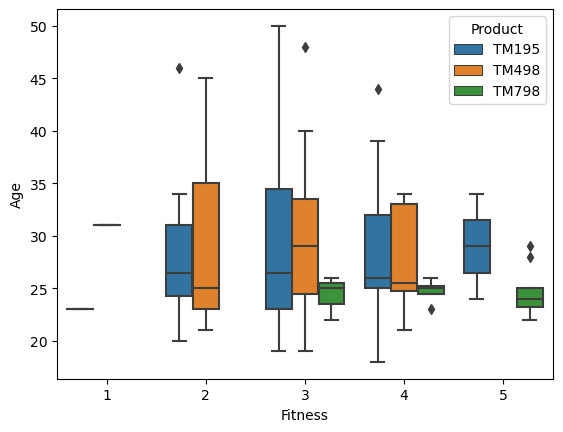

In [61]:
sns.boxplot(x='Fitness',
            y = 'Age',
    hue='Product',
    data=df)
plt.show()
#CONC

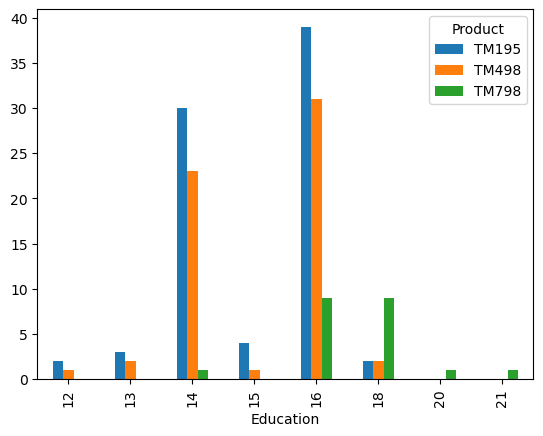

In [62]:
pd.crosstab(df['Education'] ,df['Product']).plot(kind= 'bar')
plt.show()

**Inferences**:
- **The sales team should focus the high range product's marketing to males who are married and have higher income than 50k and who uses the product more than or equal to 4 times in a week and who have education more than or equal to 16 years**(This should be the target audience for TM798)

# Multivariate Analysis

# Checking correlation among different features

In [63]:
corr_matrix=df[['Age','Education','Usage','Fitness','Income','Miles','Unit Product Price']].corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles,Unit Product Price
Age,1.000000,0.208992,-0.125330,-0.118570,0.551113,-0.165710,-0.188852
Education,0.208992,1.000000,0.315696,0.313260,0.600964,0.260524,0.468528
Usage,-0.125330,0.315696,1.000000,0.578850,0.279502,0.744355,0.492740
Fitness,-0.118570,0.313260,0.578850,1.000000,0.246177,0.780566,0.576826
Income,0.551113,0.600964,0.279502,0.246177,1.000000,0.252686,0.434169
Miles,-0.165710,0.260524,0.744355,0.780566,0.252686,1.000000,0.531220
Unit Product Price,-0.188852,0.468528,0.492740,0.576826,0.434169,0.531220,1.000000


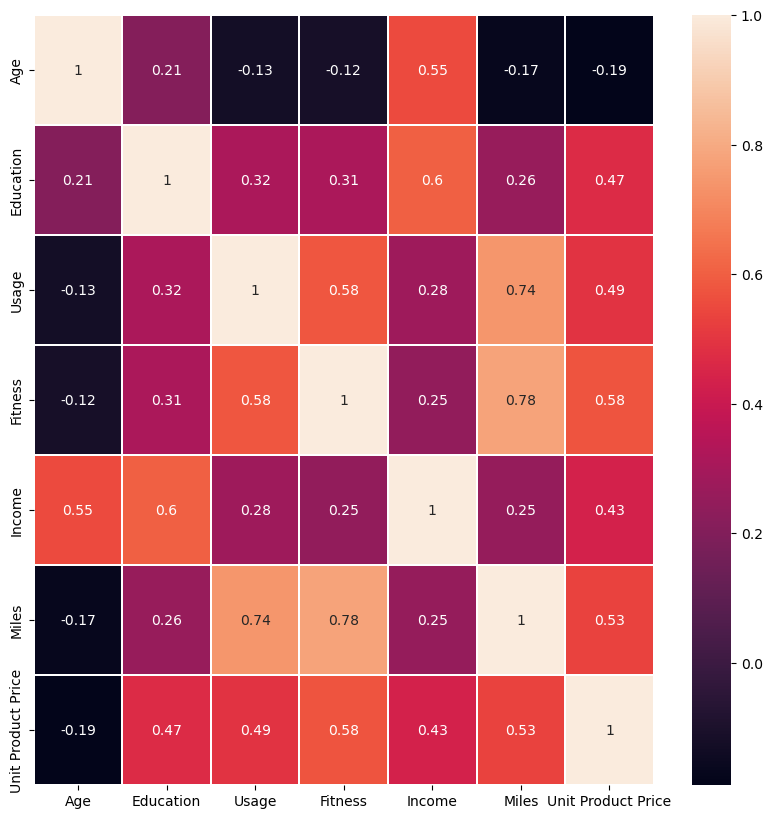

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.3, linecolor='white')
plt.show()

**Inferences**:

- Age,Education,Usage,Fitness & Miles has significant correlation with Income and vice versa.
- Usage and Fitness are highly correlated with Miles and vice versa.

In [71]:
pd.crosstab(index=df['Product'], columns=[df['MaritalStatus'],df['Gender']],margins=True )  

MaritalStatus Partnered      Single       All
Gender           Female Male Female Male     
Product                                      
TM195                27   21     13   19   80
TM498                15   21     14   10   60
TM798                 1    9      3    8   21
All                  43   51     30   37  161

- Partnered Female bought TM195 Model compared to Partnered male.
- Partnered Male customers bought TM498 & TM798 models more than Single Male customers.
- Single Female customers bought TM498 model more than Single male customers.
- Single Male customers bought TM195 & TM798 models compared to Single females.
- The majority of treadmill buyers are men.

**Observations**:
- TM195 model is the most purchased model (44.4%) then TM498 (33.3%). 
- TM798 is the least sold model (22.2%).
- There are more Male customers (57.8%) than Female customers (42.2%).
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28.
- Most of the customers earns less than 70K and prefer TM195 & TM498 models.
- 59.4% of the customers who purchased treadmill are partnered.
- Customers average education is 16.


# Final Observations and Inferences

- Total sales for Cardio Good Fitness treadmills of unit price USD 1500(TM195) is USD 120000, USD 1750(TM498) is USD 105000, USD 2500(TM798) is USD 100000

- TM798 Treadmill with advanced features is preffered by the customers with higher income.

- TM195 Treadmill with the lowest cost and basic features is preffered by the customers with lower income and the TM498 product with moderate features are liked by the customers with upper bracket of low - moderate income group.

- TM195 model is the most purchased model (44.4%) then TM498 (33.3%). 
- TM798 is the least sold model (22.2%).
- There are more Male customers (57.8%) than Female customers (42.2%).
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28.
- Most of the customers earns less than 70K and prefer TM195 & TM498 models.
- 59.4% of the customers who purchased treadmill are partnered.
- Customers average education is 16.
- Most customers have income less than 70k.
- Customers run on an average 80 miles per week.

- There aren't any significant outliers for Bivariate Analysis of Products and the Income of customers purchasing those products. So no need for outlier removal here.

- After outlier removal for income, 19 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - **df_scopy**

- In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.

- After dealing with outliers, we can infer that, there's a 7.31% correction in the Income data after removing outliers as we can see that the difference in the mean and median has decreased from 3123 to 228. Hence the new dataframe i.e **df_scopy**is more suitable for carrying further analysis w.r.t income and gender related cases.

- Most of the buyers who have income greater than 80K, prefers to buy product TM798 with advanced features.

- **Significant no. of Outliers (higher end) are present** as there are very few persons who earn >80k. This makes us mandatory to handle outliers which has been taken care in the first case. Shallow copy of our dataframe(**ds_scopy**) consists of modified data after dealing with ouliers.

- Also, After further analysis, we got to know that, as the **with dataframe without income ouliers, we aren't getting any significant disturbances expect the higher income group, hence it's benefetial to keep outliers i.e first (df) for further inferences as if we use df_scopy, then it might lead us to falsification of data due to data deletion**

- Customers having lower income range (<60K) prefer to buy models TM195 & TM498 and expect to use treadmill 2-5 times/week.

- Mostly Higher earning customers bought TM798 and expect to use treadmill 4-6 times/week.


**Inferences with Customer Profiles** : 


- The target audience for TM798 Treadmill should be the higher income group. So the sales team must focus on this range.

- **The sales team should focus the high range product's marketing to males who are married and have higher income than 50k and who uses the product more than or equal to 4 times in a week and who have education more than or equal to 16 years**(This should be the target audience for TM798)

- High cost/advanced featured TM798 product usage is more among people who are buying it. So, it's a win - win situation for the company to focus on the target audience - (to **MALES** who are **MARRIED** and have **higher income than 50k** and who uses the product more than or equal to **4 times in a week(usage)** and who have **education more than or equal to 16 years**)

- Education level is directly correlated with income as highlighted in the correlation heatmap above, so highly educated indviduals are more likely to purchase the more expensive model.The sales team should focus on this aspect.

Business Recommendation for TM498:

- **Among the low to moderate income groups, TM498 is more preferred over TM195 in terms of usage per week i.e 2-4 times/week. If the salesman, gets such insights from the customers willing to purchase treadmills,  he/she should definitely pitch in the moderate range (TM498) product. If the insights are w.r.t fitness and the person is moderately fir (2-4), then also, the salesman should pitch in for TM498 as it's most appealing as it has more features than basic one and less expensive than the advance one. The overall sales should focus on how to increase the market cap of this moderate ranged product so that the company will earn more rather than focusing on the basic one. This is evident from the calculations of total units sold and revenue earned by company for TM498 is USD 105000, which is nearly equal to (TM798) whose revenue  is USD 100000, given the units sold for TM498 are 20 more than TM798.
So to conclude, the target for the company should be to increase the overall percentage for TM498 and make it highest selling product and with the given  statistics, it's bound to boost the income for Cardio Good Fitness in long run.**



**1. TM195**

- Customers who bought this treadmill have income less than 60k with an average of 55K.
- This model has same level of popularity in Male customers as well as Female customers as it has same numbers of Male and Female customers.
- Average age of customer who purchases TM195 is 28.5.
- This model is popular among Bachelors as average years of education of customers for this product is 15.
- Self rate fitness level of customer is average.
- Customers expect to use this treadmill 3-4 times a week.
- It is the most popular model (in all genders) because of its appealing price and affordability with 33.3% of sales.
- Customers who bought this treadmill want fitness level atleast average and maybe they were looking for a basic treadmill with appealing price that also does the job.


**2. TM498**

- This model is second most sold model with 33.3% of sales.
- Customers with lower income purchase TM195 and TM498 model may be because of lower cost of the Treadmill.
- Average age of customer who purchases TM498 is 29.
- This model is popular among Bachelors as average years of education of customers for this product is 16.
- Customers expecting TM498 model to use less frequently but to run more miles per week on this.
- This model is popular more in Single Female customers compare to Single male customers may be because of difference in provided features or color scheme.

**3. TM798**

- This is the least sold product(22.2% sales) in company lineup of Treadmill may be because of it heafty price range making it Company's Premium product.
- This model is popular with customers having high income range as average Income is 75K .
- Average age of customer who purchases TM798 is 29.
- This model is popular among Customers with higher education as average education is 17 years.
- Treadmill may have some advanced features as people with high income are ready to spend money to buy this model
- Customers expected usage on this model is 4-5 day a week with moderate Miles to run having average 166 miles per week.
- Male customers who are more serious about fitness or Professionals buy this mode (self fitness rating 3-5).
- From the customer profiling using marginal probabilty and conditional probability, we can easily get all the stats in percentage - like we can say that there are no one in the very high income group who is willing to purchase TM798.